<a href="https://colab.research.google.com/github/pavansalve/ML-Test/blob/main/prophet_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 126.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from prophet import Prophet
import streamlit as st

In [4]:
df = pd.read_csv('/ML Leave Prediction - Sheet1.csv')


In [5]:
df.head()

,Date,No. of Days,Month,Leave Type,Category
0,2024-01-02,2.0,1.0,Personal Time Off,Planned
1,2024-01-01,5.0,1.0,Personal Time Off,Planned
2,2024-01-01,5.0,1.0,Personal Time Off,Planned
3,2024-01-01,5.0,1.0,Personal Time Off,Planned
4,2023-12-26,9.0,12.0,Personal Time Off,Planned


In [6]:
df.columns

Index(['Date', 'No. of Days', 'Month', 'Leave Type', 'Category'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6495 non-null   object 
 1   No. of Days  6494 non-null   float64
 2   Month        6360 non-null   float64
 3   Leave Type   6495 non-null   object 
 4   Category     6495 non-null   object 
dtypes: float64(2), object(3)
memory usage: 253.8+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6495 non-null   datetime64[ns]
 1   No. of Days  6494 non-null   float64       
 2   Month        6360 non-null   float64       
 3   Leave Type   6495 non-null   object        
 4   Category     6495 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 253.8+ KB


In [11]:
df.isnull().sum()

Date             0
No. of Days      1
Month          135
Leave Type       0
Category         0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

Date           0
No. of Days    0
Month          0
Leave Type     0
Category       0
dtype: int64

In [14]:
df=df[df['Leave Type']!= 'Maternity Leave']

In [15]:
df=df[df['Leave Type']!= 'Paternity Leave']

In [16]:
df.head()

,Date,No. of Days,Month,Leave Type,Category
0,2024-01-02,2.0,1.0,Personal Time Off,Planned
1,2024-01-01,5.0,1.0,Personal Time Off,Planned
2,2024-01-01,5.0,1.0,Personal Time Off,Planned
3,2024-01-01,5.0,1.0,Personal Time Off,Planned
4,2023-12-26,9.0,12.0,Personal Time Off,Planned


In [19]:
df = df[["Date", "No. of Days"]]

new_names = {
    "Date": "ds",
    "No. of Days": "y",
}

df.rename(columns=new_names, inplace=True)

In [20]:
m = Prophet()
m.fit(df)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwid_29z/bqf5qqyk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwid_29z/u0zfu4y0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65858', 'data', 'file=/tmp/tmpqwid_29z/bqf5qqyk.json', 'init=/tmp/tmpqwid_29z/u0zfu4y0.json', 'output', 'file=/tmp/tmpqwid_29z/prophet_modelm2k79pa0/prophet_model-20231110092314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:23:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:23:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
df.tail()

,ds,y
6355,2021-06-23,1.0
6356,2021-06-23,1.0
6357,2021-06-22,1.0
6358,2021-06-22,1.0
6359,2021-06-22,1.0


In [22]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
648,2024-01-28
649,2024-01-29
650,2024-01-30
651,2024-01-31
652,2024-02-01


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
648,2024-01-28,1.482489,-0.567471,3.658369
649,2024-01-29,2.117798,-0.010645,4.033787
650,2024-01-30,1.770985,-0.353825,3.848722
651,2024-01-31,1.883702,-0.187572,3.934790
652,2024-02-01,1.935819,-0.137711,3.905177


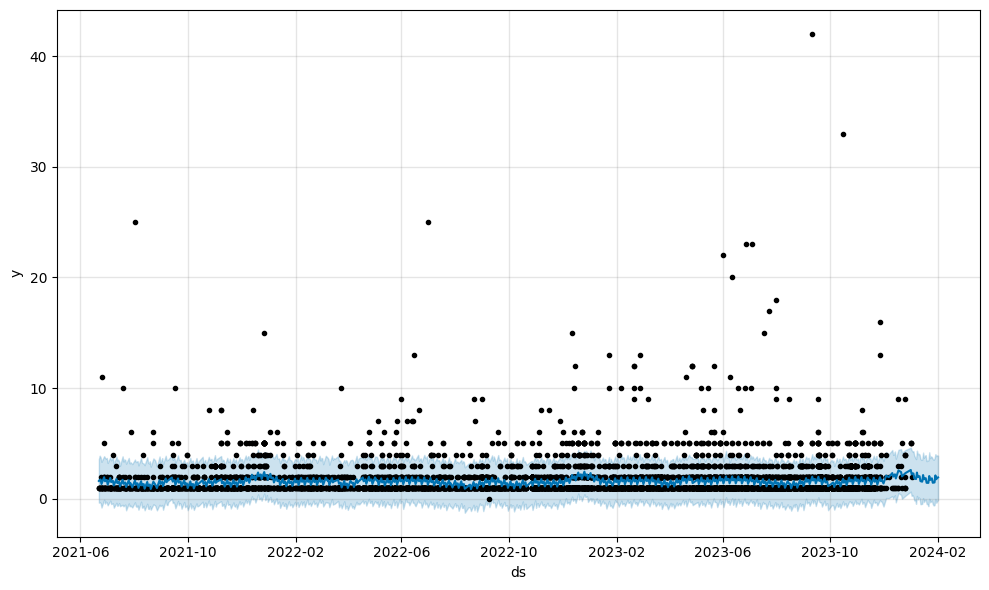

In [24]:
fig1 = m.plot(forecast)

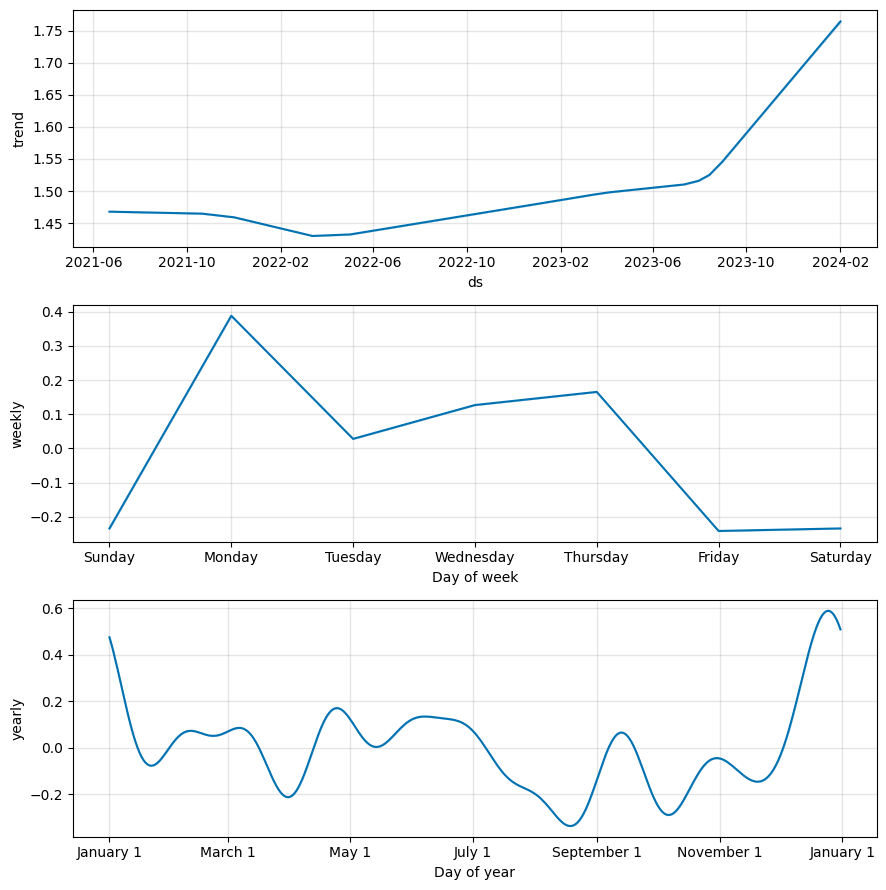

In [25]:
fig2 = m.plot_components(forecast)

In [26]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [27]:
plot_components_plotly(m, forecast)